## **EDA Phyton II**
**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Import Datasets**

In [ ]:
# load datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

About the data

Target variable is called Churn - it represents customers who left.

Predictor variables include all the remaining variables.

**Preliminary Look and Data Cleansing**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df. sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1068,5536-RTPWK,Male,0,Yes,No,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.05,4853.75,Yes
1872,9938-PRCVK,Female,0,Yes,Yes,41,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25,No
1625,1262-OPMFY,Female,0,Yes,No,9,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.75,655.9,Yes
6467,9494-MRNYX,Male,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.05,786.3,No
3443,5996-NRVXR,Male,1,Yes,No,40,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),98.15,4116.8,No


Observations:

    1. Many column are categorical, except tenure, MonthlyCharges, TotalCharges
    2. Variable gender, Partner, Dependents, PaperlessBilling, Churn seems to contain two distincts values (Male of Female, 
      Yer or No), but we will confirm later.
    3. PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, 
      StreamingTV, Contract seems to contain three distincts values, PaymentMethod seems to contain four distinct 
     value, but we will confirm later. 
    4. SeniorCitizen seems to contaion binary values (0,1).
    5. TotalCharges data type is object.
    6. No obvious defect on the data (column name vs its entries), all looks good.


**General Information & Missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges is object, need to be transformed into float

In [ ]:
# Checking Data
def differentnum (dataframe):
  for i in dataframe:
    if dataframe[i].dtypes == 'int' or dataframe[i].dtypes == 'float':
      print(f'{i}: {dataframe[i].unique()}')

differentnum (df)

SeniorCitizen: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


Senior Citizen contain binary number (1,0)

In [ ]:
# Checking Data
def differentobj (dataframe):
  for i in dataframe:
    if dataframe[i].dtypes == 'object':
      print(f'{i}: {dataframe[i].unique()}')

differentobj (df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


Observation

    1. Variable gender, Partner, Dependents, PaperlessBilling, Churn contain two distincts values (Male of Female, Yer or No).
    2. PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, 
       StreamingTV, Contract contain three distincts values.
    3. PaymentMethod seems to contain four distinct value.
    4. TotalCharges data type is object.

In [ ]:
# exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [ ]:
# transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observation:

    1. Data contains 21 columns with 7032 rows
    2. The columns have no missing values
    3. All dtypes seem OK (appropriate), given the corresponding column name



**Duplicated Data Check**

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

Observation

    There is no duplicated data

## Data understanding

**Statistical summary**

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'   ]

numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:

    1. SeniorCitizen is a boolean/binary column, since the value is 0 or 1.
    2. Mean < 50% (Median) in tenure, MonthlyCharges, TotalCharges, indicating negatively skewed distribution



In [ ]:
# describe method on categorical data
df[categoricals].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
# Checking Data
def different (dataframe):
  for i in dataframe:
    if dataframe[i].dtypes == 'object':
      print(f'{i}: {dataframe[i].unique()}')

different (df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Observations:

    1. gender has 2 unique value, Female and Male, Customers mostly Males (3549), and the rest are Female.
    2. Dependents has 2 unique value, Yes or No, Customers mostly have no dependents (3639), and the rest have dependents.
    3. PhoneService has 2 unique value, Yes or No, Customers mostly have no dependents (6352), and the rest have PhoneService.
    4. MultipleLines has 3 unique values, 'No phone service' 'No' 'Yes', Customers mostly have no MultipleLines (3385), and the rest Yes and No phone service.
    5. InternetService has 3 unique values, 'DSL' 'Fiber optic' 'No', Customers mostly have Fiber optic (3096) connection, and the rest have DSL and No internet service.
    6. OnlineSecurity has 3 unique values, 'No' 'Yes' 'No internet service', Customers mostly have no OnlineSecurity (3497), and the rest have OnlineSecurity and No internet service.
    7. OnlineBackup has 3 unique values, 'No' 'Yes' 'No internet service', Customers mostly have no OnlineBackup (3087), and the rest have OnlineBackup and No internet service.
    8. DeviceProtection has 3 unique values, 'No' 'Yes' 'No internet service', Customers mostly have no DeviceProtection (3094, and the rest have DeviceProtection and No internet service.
    9. TechSupport has 3 unique values, 'No' 'Yes' 'No internet service', Customers mostly have no TechSupport (3472), and the rest have TechSupport and No internet service.
    10. StreamingTV has 3 unique values, 'No' 'Yes' 'No internet service', Customers mostly have no StreamingTV (2809), and the rest have StreamingTV and No internet service.
    11. StreamingMovies has 3 unique values, 'No' 'Yes' 'No internet service', Customers mostly have no StreamingMovies (2781), and the rest have StreamingMovies and No internet service.
    12. Contract has 3 unique values, 'Month-to-month' 'One year' 'Two year', Customers mostly have 'Month-to-month' contract (3875), and the rest have 'One year' and 'Two year' contract.
    13. PaperlessBilling has 2 unique value, Yes and No, Customers mostly have PaperlessBilling (4168), and the rest are No.
    14. PaymentMethod has 4 unique values, 'Electronic check' 'Mailed check' 'Bank transfer (automatic)', and 'Credit card (automatic)', Customers mostly have 'Electronic check' payment methods (2365), and the rest have 'One year' and 'Two year' contract.
    15. Churn has 2 unique value, Yes and No, Customers mostly no churn (5163), and the rest are Yes.



## Univariate Analysis

**Boxplot to detect outliers**

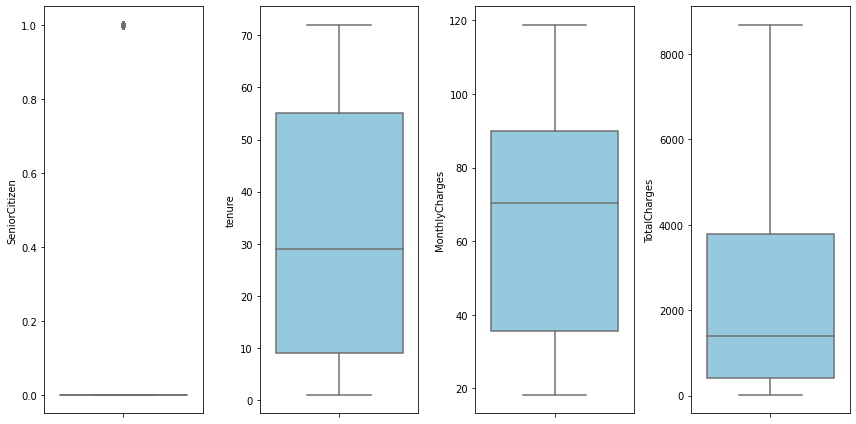

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Observation:

     No Outlier found

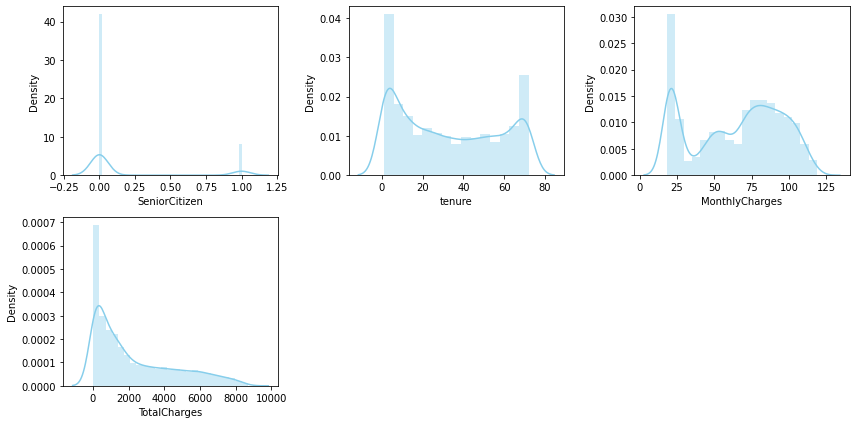

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation

    1. Total Charge is skewed right.
    2. tenure can be split into two distribution.
    3. MonhtlyCharge distribution graph can not be described (at least by me :D) 
    2. SeniorCitizen has boolean value, 0 and 1.


**Multivariate Analysis**

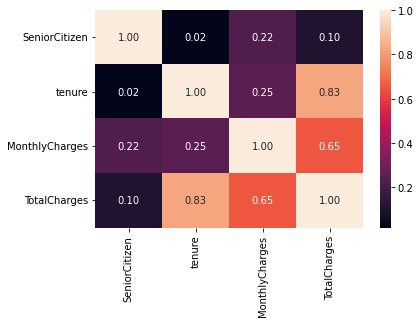

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation

    1. TotalCharges, MonthlyCharges, and tenure are highly correlated each other
    2. choose either of them for modelling because they are redundant (will be discussed in Linear Regression class :)



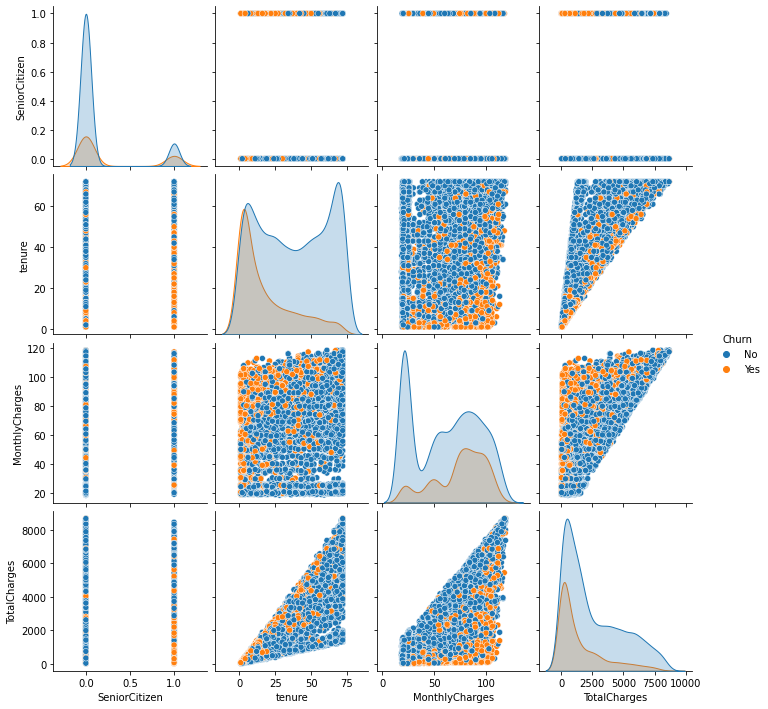

In [ ]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

explanation of each variable to churn will be described in deep-dive exploration

**Deep-dive Exploration**

In [ ]:
# remember the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


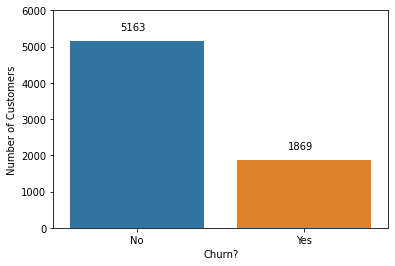

In [ ]:
ax = sns.countplot(x="Churn", data=df)

plt.xlabel("Churn?")
plt.ylabel("Number of Customers")
plt.ylim(0,6000)
plt.xticks([0,1], ['No', 'Yes'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300))
    
plt.show()

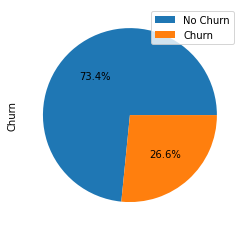

In [ ]:
df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%')

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

Observation

     1. Mostly customers do not churn.
     2. Only 26.6% (1869) of Customers churn.

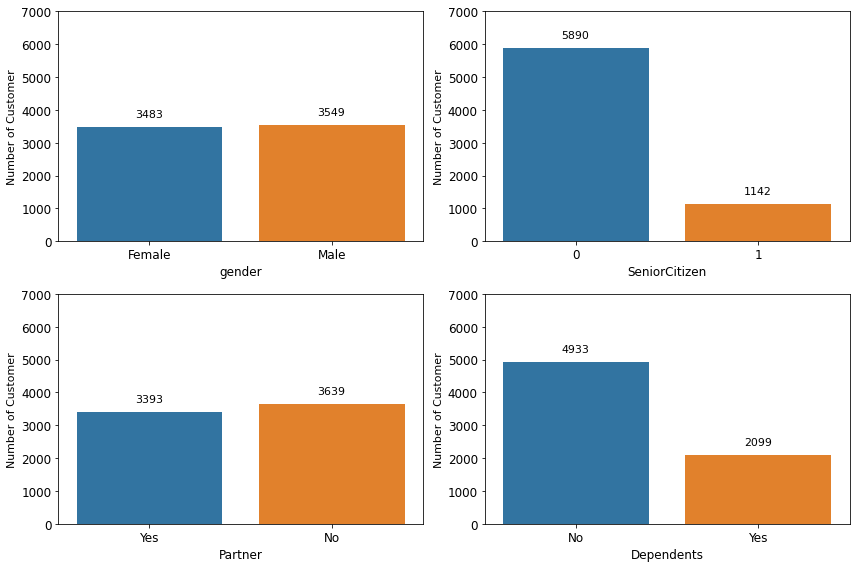

In [ ]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(12,8))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col)

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Number of Customer", fontsize= 11)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 11)

plt.tight_layout()

plt.show()

Observation

   1. Gender: There is slightly difference in the number of customer between men and women.
   2. Senior Citizen: There is only 1142 senior citizen of number of customer
   3. There is slightly difference in the number of customer between customer with partners and without partner.
   4. Dependents: Customers with dependents is less than customer without dependent.


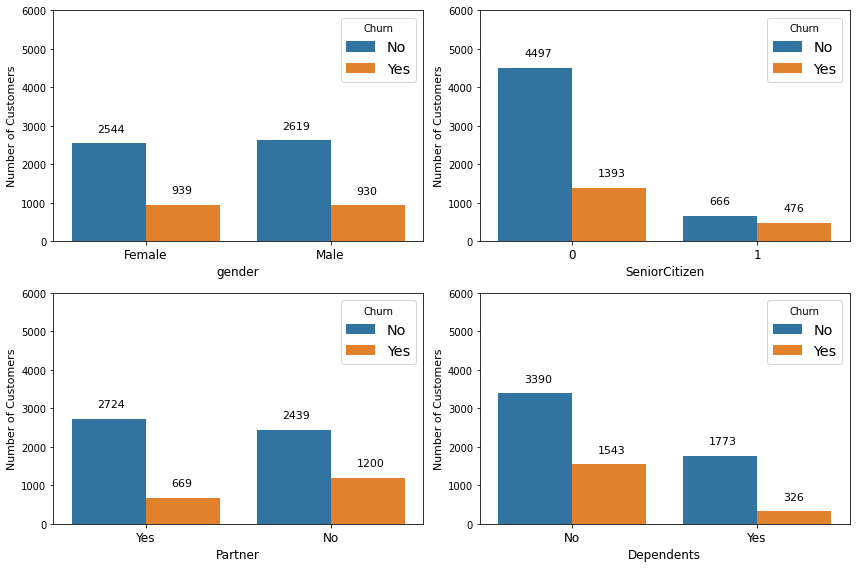

In [ ]:
plt.figure(figsize=(12,8))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Number of Customers", fontsize= 11)
    plt.ylim(0,6000)
    plt.xticks(fontsize= 12)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='10')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 11)

plt.tight_layout()

plt.show()

Observation

   1. Gender: There is barely any difference in churn percentage between men and women;
   2. Senior Citizen: The number of customer churn for senior customers are high (476 of 1142), indicating a high likelihood of churn from that group;
   3. Partner: Single customers are more likely to churn than customers with partners;
   4. Dependents: Customers with dependents are less likely to churn than customers without any dependents.


In [ ]:
viz1 = df.groupby(['Partner','Dependents']).agg(
       churn = ('Churn','count')
      ).reset_index()
viz1

,Partner,Dependents,churn
0,No,No,3280
1,No,Yes,359
2,Yes,No,1653
3,Yes,Yes,1740


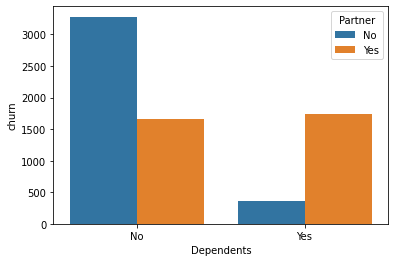

In [ ]:
sns.barplot(data = viz1, x = "Dependents", y = "churn", hue = "Partner")

Observation:

    The group of people with partners and dependents and the group with neither of those are on the extremes in terms of likelihood of churn.


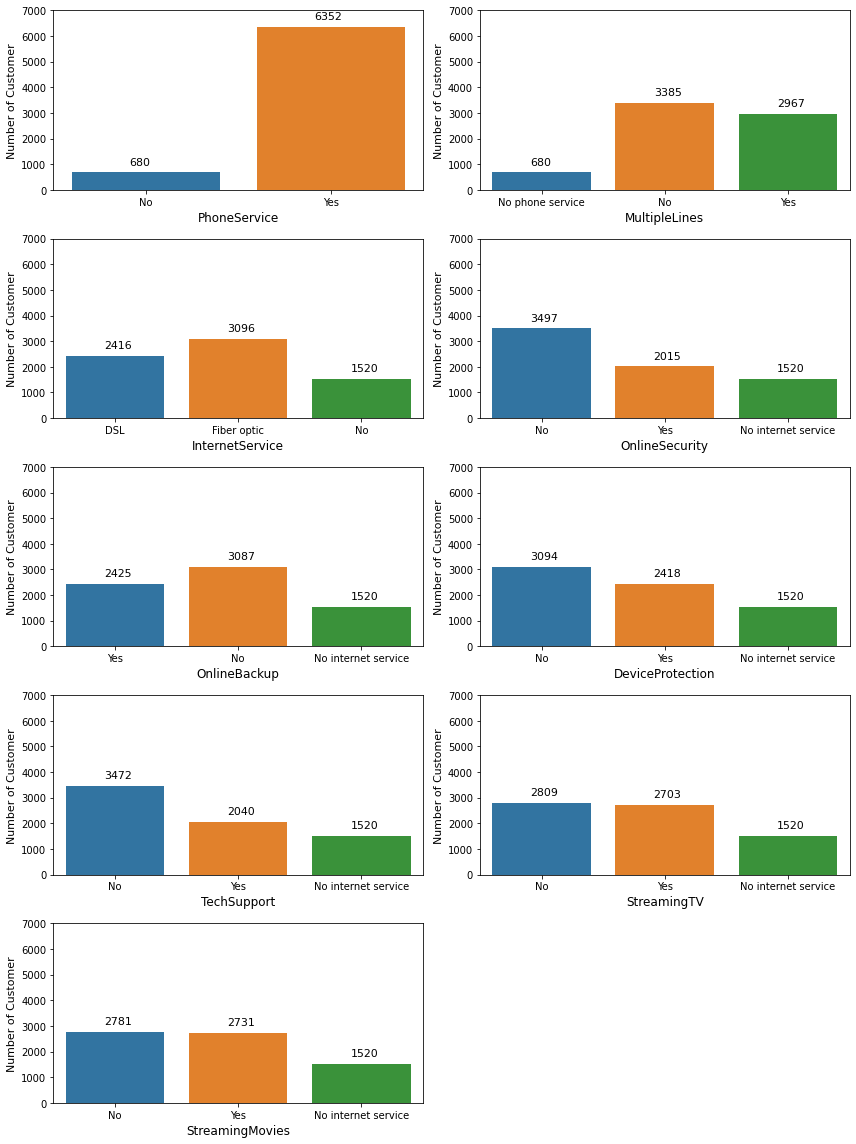

In [ ]:
serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(12,16))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col)

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Number of Customer", fontsize= 11)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 11)

plt.tight_layout()

plt.show()

Observation

    1. Most of customer have Phone Service
    2. From the customer who have PhoneService, 3385 cuatomers do not have multiple Lines.
    3. 1520 customer do not have internet service. Based on Telco Data explanation most services can be and/or are only provided to customers who sign the Telco’s internet service.

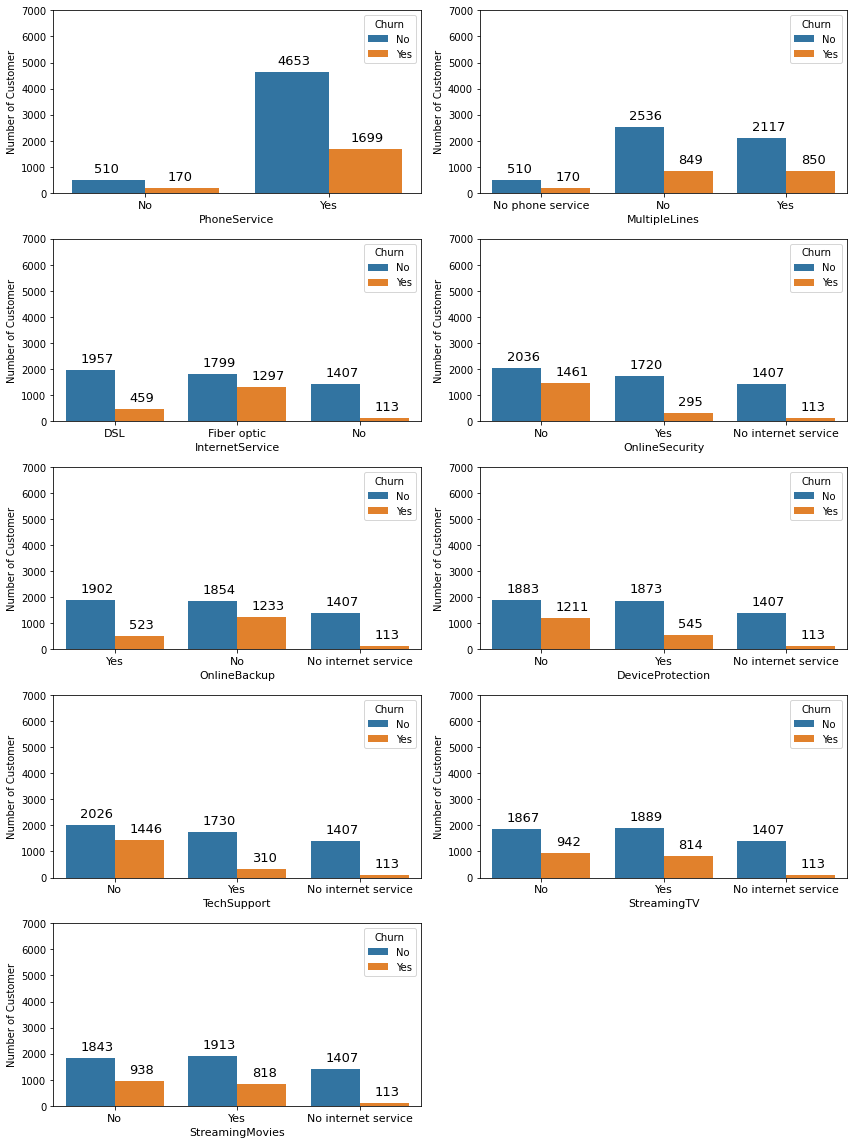

In [ ]:
plt.figure(figsize=(12,16))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 11)
    plt.ylabel("Number of Customer", fontsize= 10)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 11)
    
    plt.legend(title = 'Churn', fontsize='medium', title_fontsize='10')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

Observation

  1. The difference of churn between clients with (1699/4653) and without phone services (170/510) is quite small, been negligible if we take those with multiple lines out of equation.
  2. In the feature ‘InternetServices’, the percentage of churn in each category is highly different one from another. Those who don’t subscribe to the company’s internet (presumably, they only use their phone service), are the most likely to endure as their customers. The likelihood of churn from customers with DSL service is also smaller than the overall probability.
  3. The highest number of customer churn (1297/1799), is from customers with fiber optic internet. Fiber optic tends to be faster than DSL internet.


In [ ]:
print(df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

InternetService
No             21.076283
DSL            58.088017
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64 

TechSupport
No internet service    21.076283
No                     74.584879
Yes                    80.718799
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.076283
No                     75.693737
Yes                    78.870496
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.076283
No                   No                     74.188367
Yes                  No                     75.686398
No                   Yes                    79.764936
Yes                  Yes                    81.540374
Name: MonthlyCharges, dtype: float64


Observation:
1. Fiberoptic has the highest MothlyCharge
2. Both services (Tech Support and OnlineSecurity) don’t seem to affect the subscription charges by much. 

In [ ]:
viz2 = df.groupby(['OnlineSecurity','TechSupport']).agg(
       monthly_charges = ('MonthlyCharges','mean')
      ).reset_index()
viz2

,OnlineSecurity,TechSupport,monthly_charges
0,No,No,74.188367
1,No,Yes,79.764936
2,No internet service,No internet service,21.076283
3,Yes,No,75.686398
4,Yes,Yes,81.540374


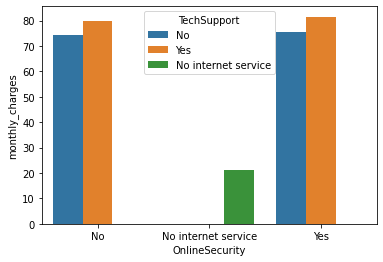

In [ ]:
sns.barplot(data = viz2, x = "OnlineSecurity", y = "monthly_charges", hue = "TechSupport")

Both services don’t seem to affect the subscription charges by much.

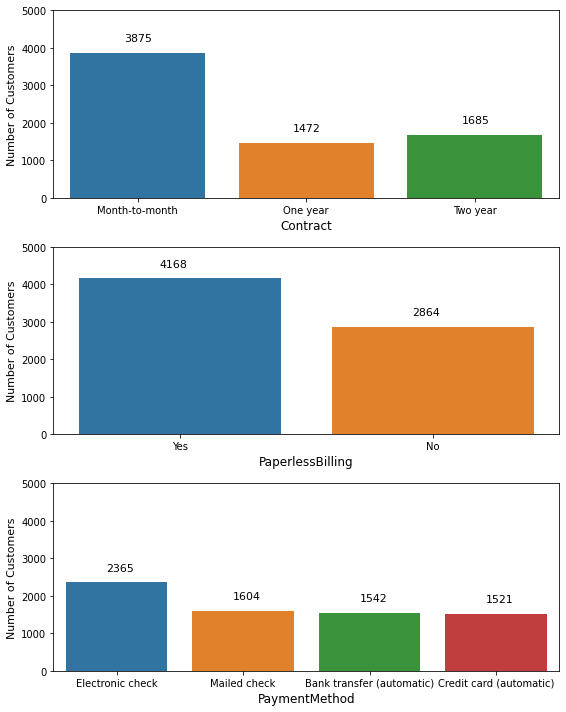

In [ ]:
account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(8,10))

for i,col in enumerate(account_features):    
    plt.subplot(3,1,i + 1)
    ax = sns.countplot(data = df, x = col)
    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Number of Customers", fontsize= 11)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 11)
plt.tight_layout()
plt.show()

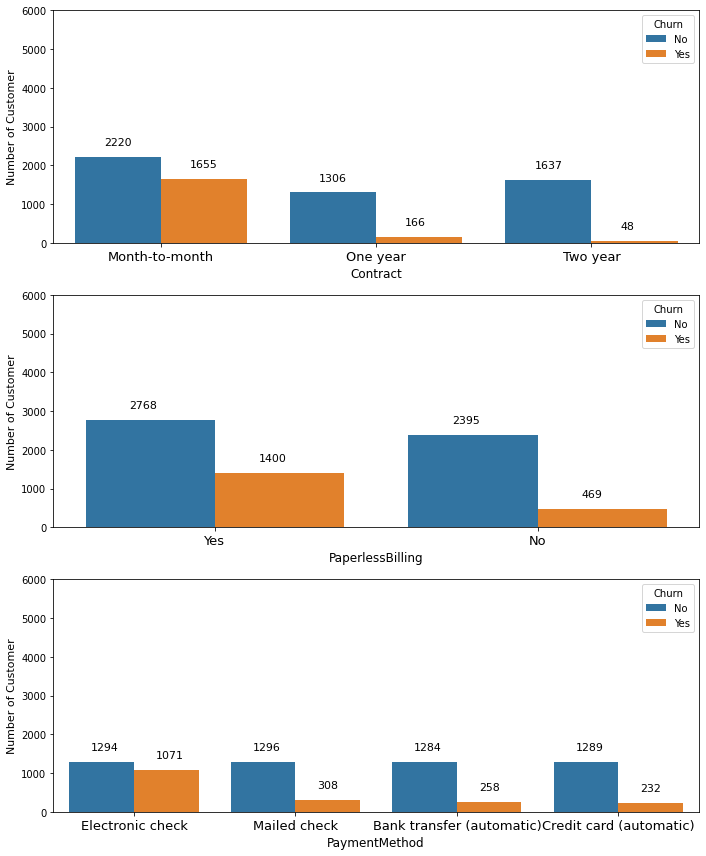

In [ ]:
plt.figure(figsize=(10,12))

for i,col in enumerate(account_features):    
    plt.subplot(3,1,i + 1)    
    ax = sns.countplot(data = df, x = col, hue="Churn")
    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Number of Customer", fontsize= 11)
    plt.ylim(0,6000)
    plt.xticks(fontsize= 13)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 11)
plt.tight_layout()
plt.show()

1. The highest churn rate is from the ‘month-to-month’ type, which is also the most dominant contract. 
2. The high chance of churn from customers who choose electronic check as payment method and opts for paperless billing. 
3. That most customers in the month-to-month contract also fall into those categories. Need further check.

In [ ]:
print(df.groupby(by=['Contract'])['PaperlessBilling'].value_counts(normalize = True),' \n')
print(df.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

Contract        PaperlessBilling
Month-to-month  Yes                 0.667355
                No                  0.332645
One year        Yes                 0.542799
                No                  0.457201
Two year        No                  0.535312
                Yes                 0.464688
Name: PaperlessBilling, dtype: float64  

Contract        PaymentMethod            
Month-to-month  Electronic check             0.477419
                Mailed check                 0.230452
                Bank transfer (automatic)    0.152000
                Credit card (automatic)      0.140129
One year        Credit card (automatic)      0.270380
                Bank transfer (automatic)    0.265625
                Electronic check             0.235734
                Mailed check                 0.228261
Two year        Credit card (automatic)      0.344214
                Bank transfer (automatic)    0.333531
                Mailed check                 0.222552
                Ele

When we group the dataset by contract, we can see that the percentage of customers who don’t receive their bills through the mail and that pay them via electronic check is higher for the ‘month-to-month’ type.

In [ ]:
viz3 = df.groupby(['Contract']).agg(
       payment = ('PaymentMethod','value_counts')
      ).reset_index()
viz3

,Contract,PaymentMethod,payment
0,Month-to-month,Electronic check,1850
1,Month-to-month,Mailed check,893
2,Month-to-month,Bank transfer (automatic),589
3,Month-to-month,Credit card (automatic),543
4,One year,Credit card (automatic),398
5,One year,Bank transfer (automatic),391
6,One year,Electronic check,347
7,One year,Mailed check,336
8,Two year,Credit card (automatic),580
9,Two year,Bank transfer (automatic),562


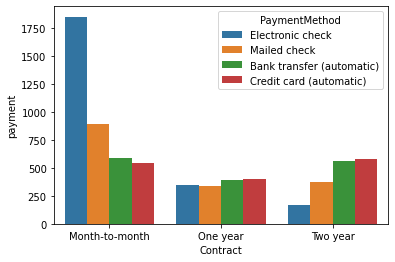

In [ ]:
sns.barplot(data = viz3, x = "Contract", y = "payment", hue = "PaymentMethod")

1. Electronic check is the highest number of payment method in monthly payment.

In [ ]:
viz4 = df.groupby(['Contract']).agg(
       payment = ('PaperlessBilling','value_counts')
      ).reset_index()
viz4

,Contract,PaperlessBilling,payment
0,Month-to-month,Yes,2586
1,Month-to-month,No,1289
2,One year,Yes,799
3,One year,No,673
4,Two year,No,902
5,Two year,Yes,783


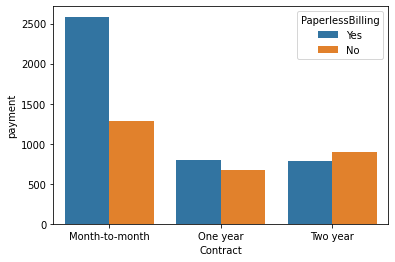

In [ ]:
sns.barplot(data = viz4, x = "Contract", y = "payment", hue = "PaperlessBilling")

1. PaperlessBilling is highest at monthly payment regardless the payment methods.


The likelihood of churn is highest in montly payment regardless of type of contract. 

Then, the connection between monthly payment and other high number variable which is the internet service should be found


In [ ]:
print(df.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(df.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaperlessBilling
DSL              Yes                 0.549669
                 No                  0.450331
Fiber optic      Yes                 0.773579
                 No                  0.226421
No               No                  0.707237
                 Yes                 0.292763
Name: PaperlessBilling, dtype: float64 

InternetService  PaymentMethod            
DSL              Electronic check             0.268212
                 Mailed check                 0.252897
                 Credit card (automatic)      0.245447
                 Bank transfer (automatic)    0.233444
Fiber optic      Electronic check             0.515181
                 Bank transfer (automatic)    0.208656
                 Credit card (automatic)      0.192829
                 Mailed check                 0.083333
No               Mailed check                 0.483553
                 Bank transfer (automatic)    0.218421
                 Credit card (automatic)      0.217763
 

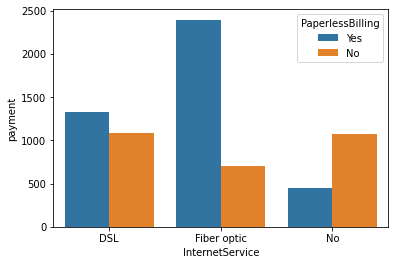

In [ ]:
viz5 = df.groupby(['InternetService']).agg(
       payment = ('PaperlessBilling','value_counts')
      ).reset_index()
sns.barplot(data = viz5, x = "InternetService", y = "payment", hue = "PaperlessBilling")

Observation:

   1. Mostly, the customer who do not have internet service prefer not to use PaperlessBilling.
   2. The customer who have internet service (DSL & Fiber Optic) prefer to use PaperlessBilling

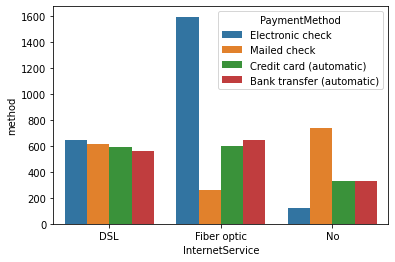

In [ ]:
viz6 = df.groupby(['InternetService']).agg(
       method = ('PaymentMethod','value_counts')
      ).reset_index()
sns.barplot(data = viz6, x = "InternetService", y = "method", hue = "PaymentMethod")

Observation:

    1. Mostly, customers who do not have internet connection prefer to use mailed check (conservative).
    2. Custumers who have Fiber Optic connection prefer to use Electronic check or automatic check.
    3. Custumers who have DSL connection tend to use all check methods

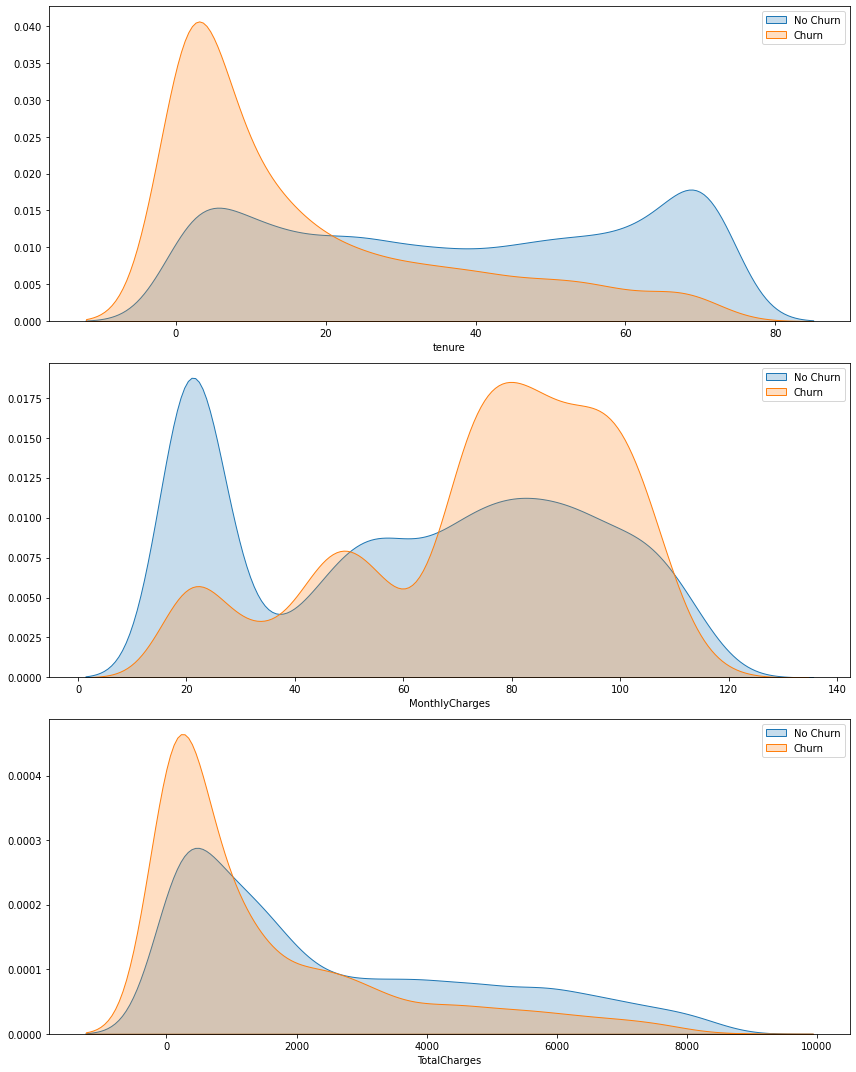

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


plt.figure(figsize=(12,15))

for i,col in enumerate(numerical_features):    
    plt.subplot(3,1,i + 1)    
    sns.kdeplot(df.loc[(df['Churn'] == 'No'), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == 'Yes'), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()



Observation:

    1.  Tenure: High concentration of the customers churn in the first months
    2. Monthly Charges: High concentration of the customers churn in higher values (around 60 and beyond)
    3. Total Charges: has similar distribution
